# <center>Neural Network Application: Image Classification </center>


## The Cats & Dogs Dataset
<img src="cat_dog_dataset.jpg" alt="Drawing" style="width: 600px;"/>

* ### You can download the photos folders from Kaggle: https://www.kaggle.com/c/dogs-vs-cats
* ### Download train.zip and unzip the 25000 files and move them to a folder and make a note of the file path

### Import Toolsets

In [321]:
import os, itertools 
import time
import random, shutil
import numpy as np 
import pandas as pd 
 
import matplotlib.pyplot as plt 
%matplotlib inline

In [322]:
from sklearn.model_selection import train_test_split

### Import TensorFlow and Keras

In [323]:
import tensorflow as tf
from tensorflow import keras

### Image Preprocessing tool

In [324]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

## <font color= blue>Load and Process the Dataset</font>

One of the more time consuming, yet critcally important step, is to prepare the dataset to be ready for the neural network training workflow. After retreiving the data files (images of dogs and cats, 25,000 each), we want to perform the following tasks: 
* `Randomly pick a subset of $N$ samples from the training dataset.` This step is only for learning purposes to save time. Once you are ready to train the entire dataset, you can skip this step. Nonetheless, this step illustrates some Python directory commands that can be useful.
* `Create target labels` for the subset, Dog for class = 1, Cat for class = 0.
* `Split the data into train set and test set.`

### Create a directory and store $N$ randomly selected data

In [325]:
# Path to the main dataset directory. You specify your directory path for data.
train_path = './train'

# Path to the directory where you want to save the subset
train_sub_path = './train_2000'

# Create the subset directory if it doesn't exist
os.makedirs(train_sub_path, exist_ok=True)

# Number of samples to select from the original training set 
num_samples = 2000

# Select N samples (cats and dogs mixed)
files = os.listdir(train_path)
selected_files = random.sample(files, num_samples)

# Copy selected files to the subset directory
for file in selected_files:
    src_path = os.path.join(train_path, file)
    dst_path = os.path.join(train_sub_path, file)
    shutil.copy(src_path, dst_path)

# List the first 10 image files
os.listdir(train_sub_path)[0:10]

['dog.5535.jpg',
 'dog.11664.jpg',
 'dog.5253.jpg',
 'dog.9469.jpg',
 'cat.10637.jpg',
 'cat.5711.jpg',
 'cat.1563.jpg',
 'dog.3636.jpg',
 'dog.5247.jpg',
 'cat.8221.jpg']

### Randomly pick an image from the newly created train set

In [326]:
directory = os.listdir(train_sub_path)
sample = random.choice(directory)
sample

'dog.3903.jpg'

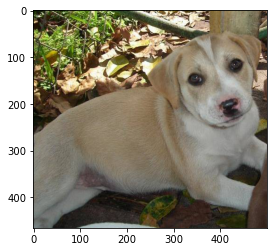

In [327]:
img = load_img(os.path.join(train_sub_path, sample))

plt.imshow(img)
plt.show()

### The images come in differeny shapes and resolutions. For practical implementations, we usually reduce the image to smaller sizes, such as 64 by 64 pixel.

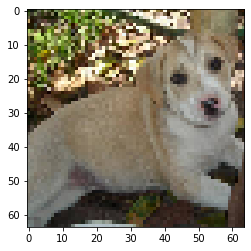

In [328]:
img = load_img(os.path.join(train_sub_path, sample), target_size=(64, 64))

# Converting the image to a 3-dimensional array 
img_array = img_to_array(img)

plt.imshow(img)
plt.show()

In [329]:
img_array.shape

(64, 64, 3)

### NumPy approach to create (resized) input image arrays and target labels 

In [330]:
# parameters for image size 
rows = 64  
cols = 64
channels = 3  # RGB

In [331]:
X = []  # training images
y = []  # class labels

for file in os.listdir(train_sub_path):
    # Load image and resize
    img = load_img(os.path.join(train_sub_path, file), target_size=(rows, cols))
    # Convert image to array and normalize pixel values
    img_array = img_to_array(img) / 255.0
    # Append to the list
    X.append(img_array)
    # Extract label from filename (assuming file name is like 'cat.1.jpg' or 'dog.1.jpg')
    label = 1 if "dog" in file else 0
    y.append(label)

In [332]:
X = np.array(X)
X.shape

(3847, 64, 64, 3)

In [333]:
y = np.array(y)
print (train_y.shape)
print ("# of dogs =", y.sum())

(2000,)
# of dogs = 1956


### Important step: flatten the image from 3-D to 1-D vector!

In [334]:
X = X.reshape(X.shape[0], -1)
X.shape

(3847, 12288)

### $N$ input samples, each with 64$\times$64$\times$3 = 12,288 features!

### Before training the NN model, split the dataset into train set and test set.

In [335]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [336]:
X_train.shape, y_test.shape

((2692, 12288), (1155,))

## <font color= blue>Building an $L$-Layer Neural Network with Keras </font>

In [337]:
from keras.models import Sequential
from keras.layers import Dense

### Neural Network Layer Hyperparameters

In [338]:
L = 2

n0 = rows * cols * channels   # number of input features
n1 = 8  # number of neurons in the hidden layer
n2 = 1  # number of neurons in the output layer

### <font color=blue>1. Define the NN model </font>

In [339]:
model = Sequential()

model.add(Dense(n1, input_dim=n0, activation="relu"))
model.add(Dense(n2, activation="sigmoid"))

### <font color=blue>2. Compile the Keras Model</font>

In [340]:
sgd = keras.optimizers.SGD(learning_rate=0.005)

model.compile(loss="binary_crossentropy", optimizer=sgd, metrics=["accuracy"])

### <font color=blue>3. Train and Fit the Model</font>

Note: when setting `verbose = 1`, the training progress will be displayed every epoch. Disable the feature when running large dataset.

In [341]:
history = model.fit(X_train, y_train, epochs=100, batch_size=20, verbose=0)

#### Display the history after running `model.fit`

In [342]:
J = history.history['loss']

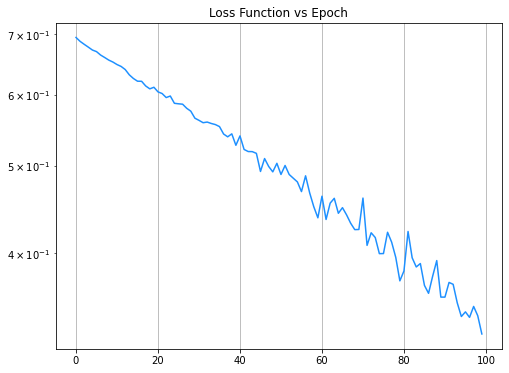

In [343]:
plt.figure(figsize=(8,6))
plt.plot(J, color='DodgerBlue')

plt.title('Loss Function vs Epoch')

#plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.show()

In [344]:
accu = history.history['accuracy']

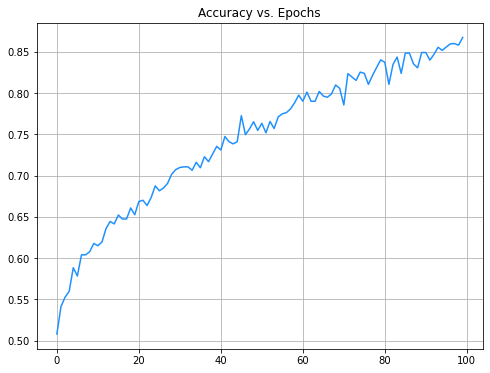

In [345]:
plt.figure(figsize=(8,6))
plt.plot(accu, color='DodgerBlue')

plt.title("Accuracy vs. Epochs")
#plt.xscale('log')
#plt.yscale('log')
#plt.legend()
plt.grid()
plt.show()

### <font color=blue>4. Test and Evaluate the Model</font>

In [346]:
loss, accuracy = model.evaluate(X_train, y_train)

85/85 [==============================] - 0s 918us/step - loss: 0.2623 - accuracy: 0.9064


### <font color=blue>5. Predicted target output, Y</font>

In [347]:
Y_pred = model.predict(X_train)

85/85 [==============================] - 0s 750us/step


### Examine the histogram of the output layer output, $\hat{Y}$

(array([737., 249., 181., 114., 114., 146., 158., 250., 357., 386.]),
 array([3.7320002e-05, 1.0001337e-01, 1.9998941e-01, 2.9996544e-01,
        3.9994150e-01, 4.9991754e-01, 5.9989357e-01, 6.9986963e-01,
        7.9984570e-01, 8.9982170e-01, 9.9979776e-01], dtype=float32),
 <BarContainer object of 10 artists>)

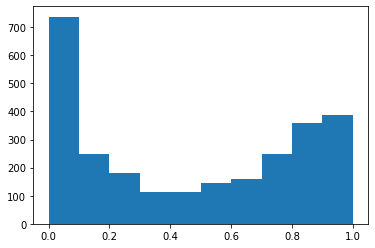

In [348]:
plt.hist(Y_pred)

### <font color=maroon> This indicates the training accuracy is very high since the probability values are mostly 0 or 1.</font>

### We need to validate the performance against the test dataset

### <font color=blue>6. Evaluation on the test set </font>

In [349]:
loss_t, accuracy_t = model.evaluate(X_test, y_test)

37/37 [==============================] - 0s 885us/step - loss: 0.8837 - accuracy: 0.5844


37/37 [==============================] - 0s 858us/step


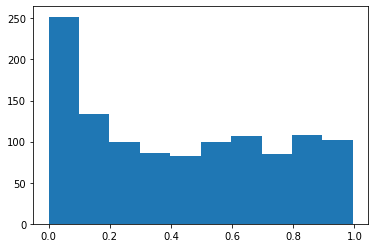

In [350]:
Y_pred_t = model.predict(X_test)
plt.hist(Y_pred_t)
plt.show()

### <font color=maroon> The evaluation on the test set is poor, only ~60%! This implies the model is overfitting the training set and may be too simple</font>

## <font color=green>Build a $L$-Layer NN, $L > 2$</font>

In [306]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

In [307]:
X_train.shape, y_test.shape

((1400, 12288), (600,))

In [308]:
L = 4

n0 = rows * cols * channels
n = np.array([n0, 20, 7, 5, 1])

In [309]:
n

array([12288,    20,     7,     5,     1])

In [310]:
model = Sequential()

model.add(Dense(n1, input_dim=n0, activation="relu"))

for i in range(2, L):
    model.add(Dense(n[i], activation="relu"))
    
model.add(Dense(n[L], activation="sigmoid"))

In [311]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 8)                 98312     
                                                                 
 dense_53 (Dense)            (None, 7)                 63        
                                                                 
 dense_54 (Dense)            (None, 5)                 40        
                                                                 
 dense_55 (Dense)            (None, 1)                 6         
                                                                 
Total params: 98,421
Trainable params: 98,421
Non-trainable params: 0
_________________________________________________________________


In [312]:
sgd = keras.optimizers.SGD(learning_rate=0.005)
model.compile(loss="binary_crossentropy", optimizer=sgd, metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=2500, batch_size=20, verbose=0)

loss, accuracy = model.evaluate(X_train, y_train)

Y_pred = model.predict(X_train)

44/44 [==============================] - 0s 750us/step


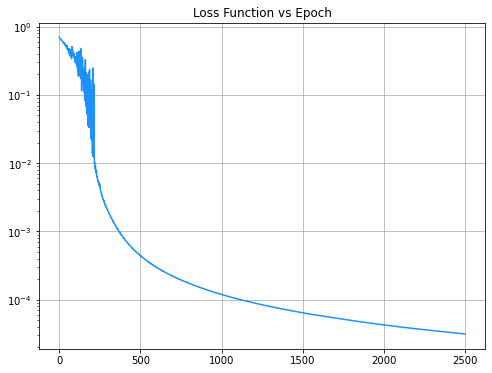

In [313]:
J = history.history['loss']

plt.figure(figsize=(8,6))
plt.plot(J, color='DodgerBlue')

plt.title('Loss Function vs Epoch')

#plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.show()

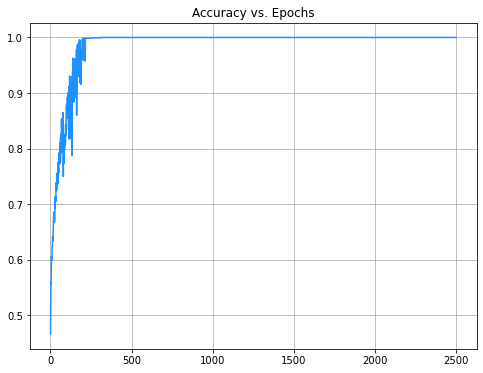

In [314]:
accu = history.history['accuracy']

plt.figure(figsize=(8,6))
plt.plot(accu, color='DodgerBlue')

plt.title("Accuracy vs. Epochs")
#plt.xscale('log')
#plt.yscale('log')
#plt.legend()
plt.grid()
plt.show()

### Evaluation on the test set

In [315]:
loss_t, accuracy_t = model.evaluate(X_test, y_test)

19/19 [==============================] - 0s 986us/step - loss: 3.5003 - accuracy: 0.6133
